<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-Fashion-MNIST-Dataset" data-toc-modified-id="Get-Fashion-MNIST-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get Fashion MNIST Dataset</a></span><ul class="toc-item"><li><span><a href="#Pytorch" data-toc-modified-id="Pytorch-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pytorch</a></span></li><li><span><a href="#Tensorflow---Keras" data-toc-modified-id="Tensorflow---Keras-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Tensorflow - Keras</a></span></li></ul></li><li><span><a href="#Building-networks" data-toc-modified-id="Building-networks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Building networks</a></span><ul class="toc-item"><li><span><a href="#Pytorch" data-toc-modified-id="Pytorch-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Pytorch</a></span><ul class="toc-item"><li><span><a href="#Initializing-weights-and-biases" data-toc-modified-id="Initializing-weights-and-biases-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Initializing weights and biases</a></span></li></ul></li><li><span><a href="#Keras" data-toc-modified-id="Keras-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Keras</a></span></li><li><span><a href="#Tensorflow" data-toc-modified-id="Tensorflow-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Tensorflow</a></span><ul class="toc-item"><li><span><a href="#Implementing-custom-layers" data-toc-modified-id="Implementing-custom-layers-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Implementing custom layers</a></span></li><li><span><a href="#Models-Composing-Layers" data-toc-modified-id="Models-Composing-Layers-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Models Composing Layers</a></span></li></ul></li></ul></li><li><span><a href="#Training-for-real" data-toc-modified-id="Training-for-real-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Training for real</a></span><ul class="toc-item"><li><span><a href="#Pytorch" data-toc-modified-id="Pytorch-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Pytorch</a></span></li><li><span><a href="#Keras" data-toc-modified-id="Keras-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Keras</a></span></li><li><span><a href="#Tensorflow" data-toc-modified-id="Tensorflow-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Tensorflow</a></span><ul class="toc-item"><li><span><a href="#Linear-Model" data-toc-modified-id="Linear-Model-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Linear Model</a></span></li><li><span><a href="#Fashion-MNIST" data-toc-modified-id="Fashion-MNIST-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Fashion MNIST</a></span><ul class="toc-item"><li><span><a href="#Using-Optimizer-apply_gradients" data-toc-modified-id="Using-Optimizer-apply_gradients-3.3.2.1"><span class="toc-item-num">3.3.2.1&nbsp;&nbsp;</span>Using Optimizer <code>apply_gradients</code></a></span></li><li><span><a href="#Using-Optimizer-minmize" data-toc-modified-id="Using-Optimizer-minmize-3.3.2.2"><span class="toc-item-num">3.3.2.2&nbsp;&nbsp;</span>Using Optimizer <code>minmize</code></a></span></li></ul></li></ul></li></ul></li></ul></div>

# Neural networks

In [3]:
# Import things like usual

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

import matplotlib.pyplot as plt

In [4]:
import torch
from torchvision import datasets, transforms

In [5]:
import tensorflow as tf

## Get Fashion MNIST Dataset

In [39]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [59]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
#    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img)
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(class_names, size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

### Pytorch

In [10]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize(0.5, 0.5),#(0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
# Download and load the training data
trainset = datasets.FashionMNIST('FashionMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('FashionMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [11]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [18]:
images.shape

torch.Size([64, 1, 28, 28])

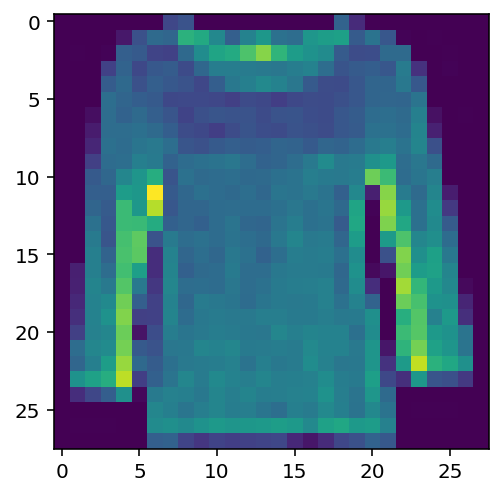

In [12]:
plt.imshow(images[1].numpy().squeeze());

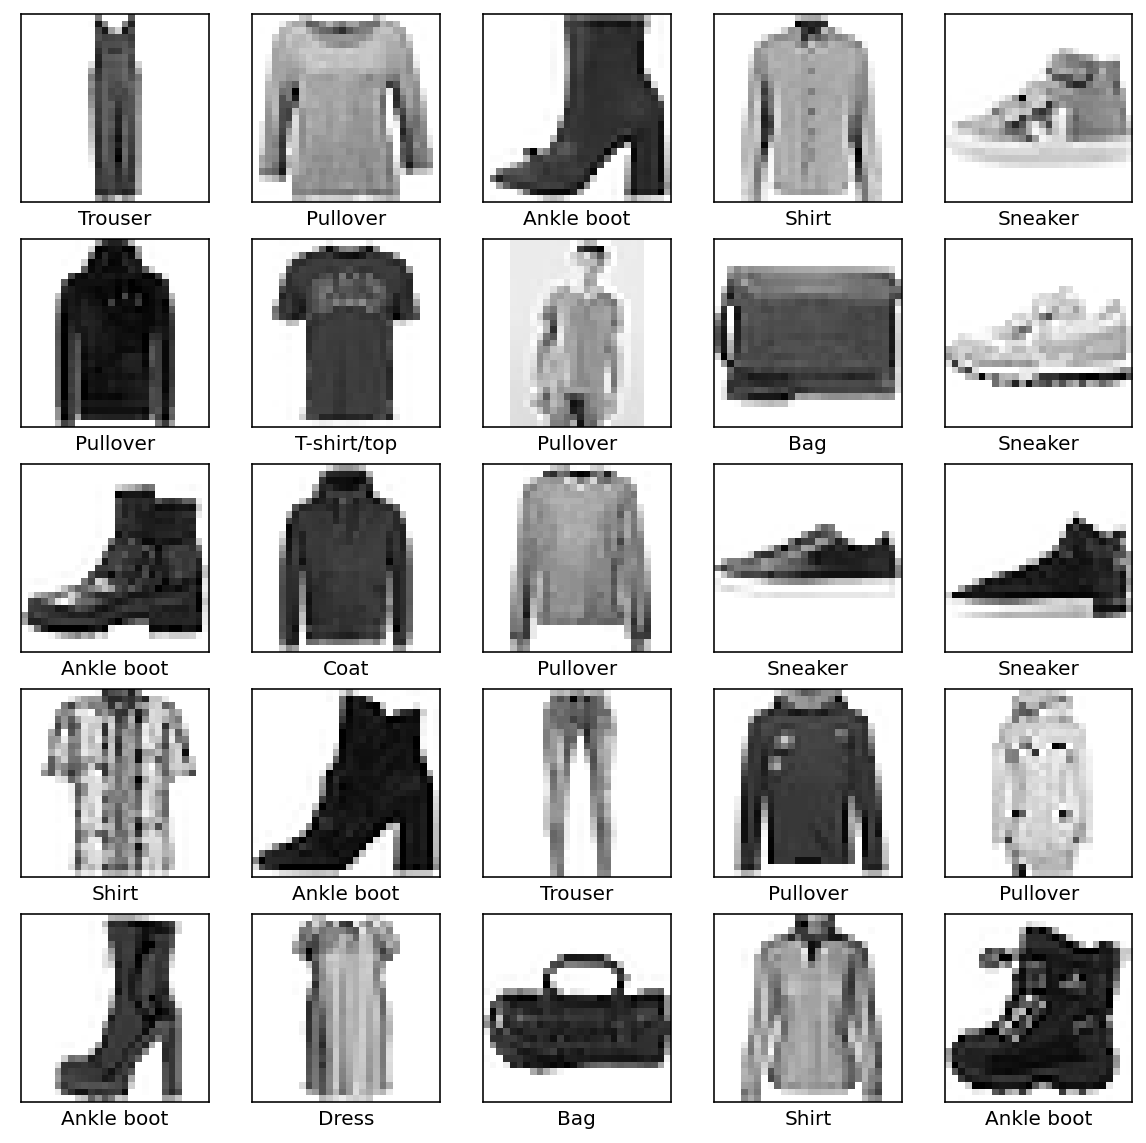

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].numpy().squeeze(), cmap=plt.cm.binary)
    plt.xlabel(class_names[labels[i]])
plt.show()

### Tensorflow - Keras

In [54]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [55]:
train_images.shape, len(train_labels), test_images.shape, len(test_labels)

((60000, 28, 28), 60000, (10000, 28, 28), 10000)

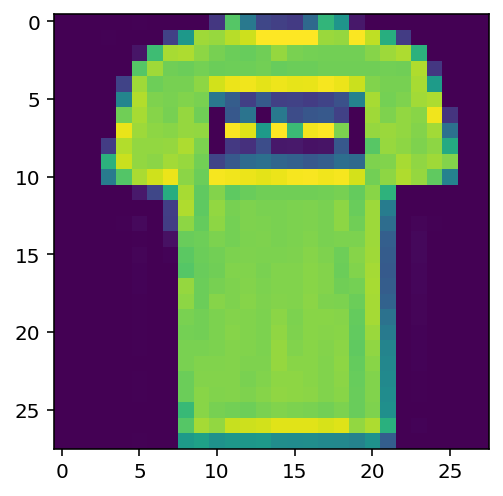

In [17]:
plt.imshow(train_images[1].squeeze());

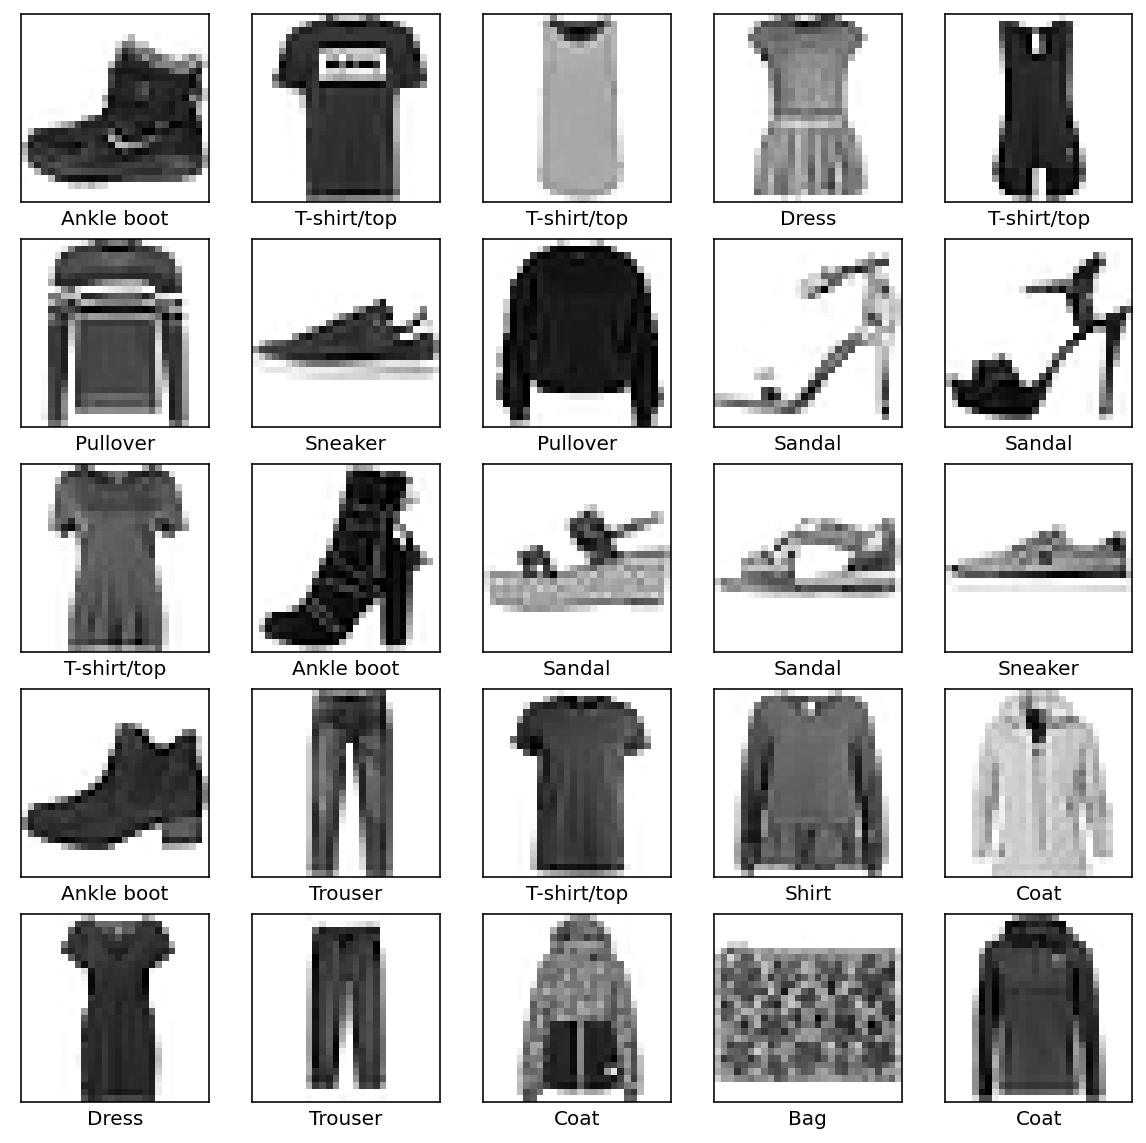

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building networks

Here I'll use PyTorch to build a simple feedfoward network to classify the MNIST images. That is, the network will receive a digit image as input and predict the digit in the image.

<img src="assets/mlp_mnist.png" width=600px>

To build a neural network with PyTorch, you use the `torch.nn` module. The network itself is a class inheriting from `torch.nn.Module`. You define each of the operations separately, like `nn.Linear(784, 128)` for a fully connected linear layer with 784 inputs and 128 units.

The class needs to include a `forward` method that implements the forward pass through the network. In this method, you pass some input tensor `x` through each of the operations you defined earlier. The `torch.nn` module also has functional equivalents for things like ReLUs in `torch.nn.functional`. This module is usually imported as `F`. Then to use a ReLU activation on some layer (which is just a tensor), you'd do `F.relu(x)`. Below are a few different commonly used activation functions.

<img src="assets/activation.png" width=700px>

So, for this network, I'll build it with three fully connected layers, then a softmax output for predicting classes. The softmax function is similar to the sigmoid in that it squashes inputs between 0 and 1, but it's also normalized so that all the values sum to one like a proper probability distribution.

### Pytorch

In [24]:
from torch import nn
from torch import optim
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)

In [78]:
from collections import OrderedDict

model = nn.Sequential(OrderedDict([('fc1', nn.Linear(784,128)),
                                   ('relu1', nn.ReLU()),
                                   ('fc2', nn.Linear(128,64)),
                                   ('relu2', nn.ReLU()),
                                   ('fc3', nn.Linear(64, len(class_names))),
#                                   ('softmax', nn.Softmax())
                                  ]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

#### Initializing weights and biases

The weights and such are automatically initialized for you, but it's possible to customize how they are initialized. The weights and biases are tensors attached to the layer you defined, you can get them with `model.fc1.weight` for instance.

In [75]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0273,  0.0289, -0.0160,  ...,  0.0279, -0.0292, -0.0061],
        [ 0.0346,  0.0261, -0.0245,  ..., -0.0067, -0.0290, -0.0142],
        [ 0.0257, -0.0327, -0.0219,  ...,  0.0042,  0.0068,  0.0092],
        ...,
        [ 0.0159, -0.0269,  0.0300,  ..., -0.0188,  0.0131, -0.0280],
        [ 0.0222,  0.0186,  0.0002,  ...,  0.0263,  0.0171,  0.0064],
        [ 0.0058, -0.0121, -0.0104,  ..., -0.0020,  0.0201,  0.0234]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0146,  0.0049, -0.0343, -0.0153,  0.0281, -0.0158,  0.0339, -0.0167,
        -0.0148, -0.0142,  0.0148, -0.0257,  0.0348, -0.0243,  0.0287, -0.0084,
        -0.0296, -0.0218, -0.0036,  0.0306, -0.0164, -0.0345, -0.0122, -0.0087,
        -0.0022,  0.0185, -0.0016,  0.0262,  0.0035,  0.0054, -0.0162, -0.0012,
        -0.0067, -0.0281, -0.0284, -0.0177,  0.0226,  0.0038,  0.0203, -0.0175,
        -0.0354,  0.0220,  0.0098, -0.0229, -0.0202, -0.0167,  0.0291,  0.0279,
         0.0288

For custom initialization, we want to modify these tensors in place. These are actually autograd *Variables*, so we need to get back the actual tensors with `model.fc1.weight.data`. Once we have the tensors, we can fill them with zeros (for biases) or random normal values.

In [31]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0132, -0.0055, -0.0038,  ..., -0.0048, -0.0009, -0.0048],
        [-0.0081, -0.0008, -0.0017,  ..., -0.0001, -0.0199,  0.0023],
        [-0.0042, -0.0032, -0.0029,  ..., -0.0091, -0.0090,  0.0064],
        ...,
        [ 0.0005, -0.0117, -0.0023,  ..., -0.0062,  0.0098,  0.0200],
        [-0.0048, -0.0105,  0.0027,  ..., -0.0177,  0.0017, -0.0141],
        [ 0.0080,  0.0014, -0.0107,  ...,  0.0057, -0.0071, -0.0079]],
       requires_grad=True)
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [79]:
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
#optimizer = optim.SGD(model.parameters(), lr=0.01)

### Keras

In [67]:
from tensorflow.keras.models import Sequential
tf.keras.backend.clear_session()

model_tf = Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                       tf.keras.layers.Dense(128, activation='relu'),
                       tf.keras.layers.Dense(64, activation='relu'),
                       tf.keras.layers.Dense(len(class_names))
                      ])
model_tf.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy']
                )

### Tensorflow

#### Implementing custom layers
https://www.tensorflow.org/tutorials/customization/custom_layers#implementing_custom_layers

In [171]:
class MyDense(tf.keras.layers.Layer):
    def __init__(self, num_outputs=32):
        super(MyDense, self).__init__()
        self.num_outputs = num_outputs
        self.kernel = None
        self.bias = None
        
    def build(self, input_shape):
        print(self.num_outputs)
        self.kernel = self.add_weight(name="kernel", shape=[int(input_shape[-1]), self.num_outputs])
        self.bias = self.add_weight(name="bias", shape=[self.num_outputs,])
        
    def call(self, inputs):
        return tf.matmul(inputs, self.kernel) + self.bias
    
layer = MyDense(10)
layer

In [172]:
_ = layer(tf.zeros([10,5]))
print([var.name for var in layer.trainable_variables])

10
['my_dense_29/kernel:0', 'my_dense_29/bias:0']


In [173]:
layer.kernel

<tf.Variable 'my_dense_29/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[-4.01623726e-01,  4.73420918e-01, -4.38384622e-01,
        -1.75909579e-01, -4.52526510e-01, -1.57360554e-01,
         1.79669917e-01, -5.37198126e-01, -2.34049499e-01,
         2.51269758e-01],
       [ 5.08589447e-01,  2.58935869e-01,  1.41333759e-01,
         5.15809596e-01,  3.13669324e-01,  6.07383668e-01,
        -4.66735840e-01, -6.15258813e-02,  2.94071436e-01,
         4.90134358e-02],
       [ 1.08413100e-02, -3.75167012e-01,  4.95263994e-01,
        -1.30397499e-01,  5.17588675e-01, -3.88424098e-01,
        -5.64471483e-01,  4.01352465e-01, -4.58052933e-01,
         8.01893473e-02],
       [-2.92825103e-02, -8.06438327e-02,  2.05277860e-01,
         1.86979771e-04,  5.63420832e-01,  4.08477724e-01,
         1.18365884e-01,  2.72628903e-01, -8.83792043e-02,
         4.14049685e-01],
       [-2.72739559e-01,  2.26440370e-01, -3.19415003e-01,
         5.27238429e-01,  4.43509519e-01, -5.94239056e-01

In [174]:
layer.bias

<tf.Variable 'my_dense_29/bias:0' shape=(10,) dtype=float32, numpy=
array([ 0.34628916,  0.45228994, -0.52413654,  0.01790887, -0.23608959,
       -0.3050728 ,  0.28625596, -0.20239717,  0.02271372,  0.2834772 ],
      dtype=float32)>

In [148]:
class SimpleDense(tf.keras.layers.Layer):

    def __init__(self, units=32):
        super(SimpleDense, self).__init__()
        self.units = units

    def build(self, input_shape):  # Create the state of the layer (weights)
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(input_shape[-1], self.units),
                                 dtype='float32'),
            trainable=True)
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(
            initial_value=b_init(shape=(self.units,), dtype='float32'),
            trainable=True)

    def call(self, inputs):  # Defines the computation from inputs to outputs
        return tf.matmul(inputs, self.w) + self.b
    
slayer = SimpleDense(10)
slayer

In [108]:
_ = slayer(tf.zeros([10,5]))
slayer.variables

[<tf.Variable 'simple_dense/Variable:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.01239564, -0.03855629, -0.01033613,  0.0176737 ,  0.05667255,
          0.05253464, -0.03119607,  0.07052975, -0.01255994, -0.03237044],
        [-0.03786435,  0.0170471 ,  0.00534064, -0.06616627, -0.11071016,
          0.0678298 , -0.0466594 ,  0.00047105, -0.06193377,  0.00063582],
        [ 0.05690379, -0.06089539,  0.04884406,  0.02166684,  0.03152365,
          0.05805198, -0.03558938,  0.00663304, -0.02864743,  0.05701224],
        [ 0.0215587 ,  0.03479614, -0.02967512,  0.02257788,  0.04535062,
         -0.03170687, -0.00586397,  0.05960369,  0.0262291 , -0.03560098],
        [-0.08631729,  0.01069665, -0.0209449 ,  0.02242791,  0.04373921,
         -0.04824658, -0.02491543, -0.02341734,  0.02355603,  0.05268512]],
       dtype=float32)>,
 <tf.Variable 'simple_dense/Variable:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

#### Models Composing Layers
https://www.tensorflow.org/tutorials/customization/custom_layers#models_composing_layers

In [181]:
class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__(name='')
        self.filters = filters
        self.kernel_sizes = [(1,1), kernel_size, (1,1)]
        self.paddings = ['valid', 'same', 'valid']
        self.conv = [tf.keras.layers.Conv2D(ft, ks, padding=pd) for ft, ks, pd in zip(self.filters, self.kernel_sizes, self.paddings)]
        self.bn = [tf.keras.layers.BatchNormalization() for _ in range(len(self.filters))]
        
    def call(self, input_tensor, training=False):
        x = self.conv[0](input_tensor)
        x = self.bn[0](x, training=training)
        x = tf.nn.relu(x)
        
        x = self.conv[1](x)
        x = self.bn[1](x, training=training)
        x = tf.nn.relu(x)
        
        x = self.conv[2](x)
        x = self.bn[2](x, training=training)

        x += input_tensor
        return tf.nn.relu(x)
    
block = ResnetIdentityBlock(1, [1,2,3])
_ = block(tf.zeros([1, 2, 3, 3]))
block.summary()

Model: "resnet_identity_block_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           multiple                  4         
_________________________________________________________________
conv2d_17 (Conv2D)           multiple                  4         
_________________________________________________________________
conv2d_18 (Conv2D)           multiple                  9         
_________________________________________________________________
batch_normalization_15 (Batc multiple                  4         
_________________________________________________________________
batch_normalization_16 (Batc multiple                  8         
_________________________________________________________________
batch_normalization_17 (Batc multiple                  12        
Total params: 41
Trainable params: 29
Non-trainable params: 12
______________________________________________

## Training for real

### Pytorch

In [80]:
epochs = 3
print_every = 40
steps = 0

for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/3...  Loss: 1.0971
Epoch: 1/3...  Loss: 0.7185
Epoch: 1/3...  Loss: 0.6397
Epoch: 1/3...  Loss: 0.6410
Epoch: 1/3...  Loss: 0.5502
Epoch: 1/3...  Loss: 0.5579
Epoch: 1/3...  Loss: 0.5428
Epoch: 1/3...  Loss: 0.5736
Epoch: 1/3...  Loss: 0.5364
Epoch: 1/3...  Loss: 0.5234
Epoch: 1/3...  Loss: 0.5188
Epoch: 1/3...  Loss: 0.4866
Epoch: 1/3...  Loss: 0.4931
Epoch: 1/3...  Loss: 0.4896
Epoch: 1/3...  Loss: 0.5287
Epoch: 1/3...  Loss: 0.4729
Epoch: 1/3...  Loss: 0.4593
Epoch: 1/3...  Loss: 0.4771
Epoch: 1/3...  Loss: 0.4892
Epoch: 1/3...  Loss: 0.4865
Epoch: 1/3...  Loss: 0.4437
Epoch: 1/3...  Loss: 0.5104
Epoch: 1/3...  Loss: 0.4435
Epoch: 2/3...  Loss: 0.2449
Epoch: 2/3...  Loss: 0.4449
Epoch: 2/3...  Loss: 0.4485
Epoch: 2/3...  Loss: 0.4028
Epoch: 2/3...  Loss: 0.4257
Epoch: 2/3...  Loss: 0.4108
Epoch: 2/3...  Loss: 0.4517
Epoch: 2/3...  Loss: 0.4314
Epoch: 2/3...  Loss: 0.4341
Epoch: 2/3...  Loss: 0.4785
Epoch: 2/3...  Loss: 0.4559
Epoch: 2/3...  Loss: 0.4469
Epoch: 2/3...  Loss:

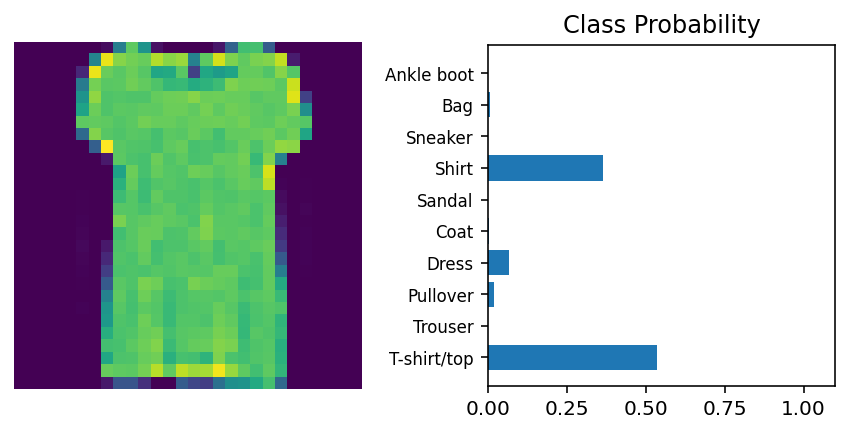

In [81]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
view_classify(img.view(1, 28, 28).numpy().squeeze(), ps.data.numpy().squeeze(), version='Fashion')

In [84]:
labels[0].numpy()

array(8)

### Keras

In [56]:
train_images = train_images/255.
test_images = test_images/255.

In [68]:
model_tf.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4921 - accuracy: 0.8255 - val_loss: 0.4082 - val_accuracy: 0.8552
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3665 - accuracy: 0.8644 - val_loss: 0.3858 - val_accuracy: 0.8620
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3333 - accuracy: 0.8769 - val_loss: 0.3734 - val_accuracy: 0.8644


In [69]:
probability_model = Sequential([model_tf, 
                                tf.keras.layers.Softmax()])

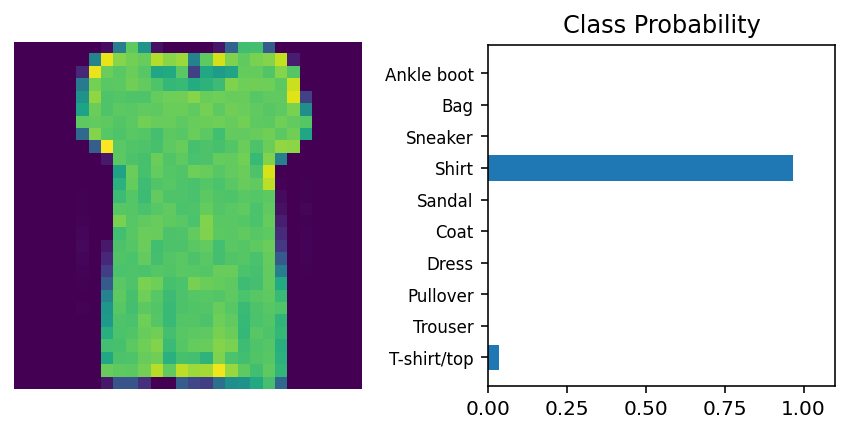

In [82]:
images, labels = next(iter(trainloader))

img = img.view(1, 28, 28).numpy().reshape(1, 28, 28)

# Output of the network are logits, need to take softmax for probabilities
ps = probability_model.predict(img)
view_classify(img[0]*255., ps[0], version='Fashion')

In [66]:
ps

array([[2.0099370e-04, 4.4769017e-06, 1.0640398e-01, 1.8450323e-06,
        8.6017048e-01, 2.2142652e-11, 3.3215147e-02, 6.6435977e-09,
        3.0981948e-06, 2.2568734e-08]], dtype=float32)

### Tensorflow
#### Linear Model

In [197]:
class MyLinearModel(object):
    def __init__(self):
        # Initialize the weights to `5.0` and the bias to `0.0`
        # In practice, these should be initialized to random values (for example, with `tf.random.normal`)
        self.W = tf.Variable(tf.random.normal(shape=(1,)))
        self.b = tf.Variable(tf.random.normal(shape=(1,)))
        
    def __call__(self, x):
        return self.W * x + self.b

model = MyLinearModel()
model(3.0)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.867888], dtype=float32)>

In [192]:
def loss(y_target, y_pred):
    return tf.reduce_mean(tf.square(y_target-y_pred))

In [188]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

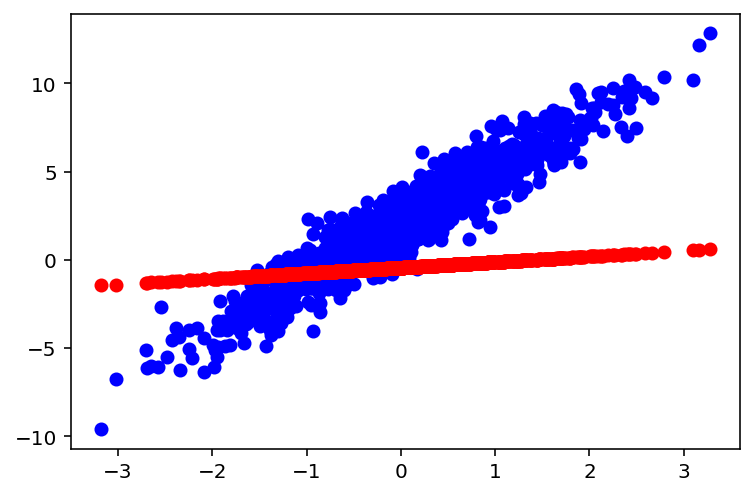

Current loss: 14.825603


In [193]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

In [194]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(outputs, model(inputs))
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=0.62 b=0.01, loss=11.16989
Epoch  1: W=1.13 b=0.42, loss=7.36226
Epoch  2: W=1.53 b=0.75, loss=4.98340
Epoch  3: W=1.84 b=1.01, loss=3.49697
Epoch  4: W=2.09 b=1.21, loss=2.56804
Epoch  5: W=2.28 b=1.38, loss=1.98742
Epoch  6: W=2.43 b=1.51, loss=1.62446
Epoch  7: W=2.55 b=1.61, loss=1.39752
Epoch  8: W=2.65 b=1.70, loss=1.25562
Epoch  9: W=2.72 b=1.76, loss=1.16686
Epoch 10: W=2.78 b=1.82, loss=1.11134
Epoch 11: W=2.83 b=1.86, loss=1.07661
Epoch 12: W=2.86 b=1.89, loss=1.05487
Epoch 13: W=2.89 b=1.92, loss=1.04127
Epoch 14: W=2.91 b=1.94, loss=1.03276
Epoch 15: W=2.93 b=1.96, loss=1.02743
Epoch 16: W=2.95 b=1.97, loss=1.02409
Epoch 17: W=2.96 b=1.98, loss=1.02200
Epoch 18: W=2.97 b=1.99, loss=1.02069
Epoch 19: W=2.97 b=2.00, loss=1.01987


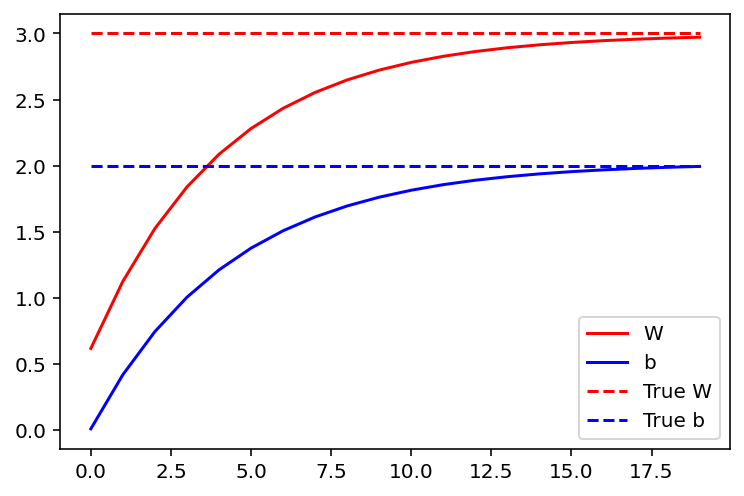

In [198]:
Ws, bs = [], []
epochs = range(20)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(outputs, model(inputs))
    
    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))
    
# Let's plot it all
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()

#### Fashion MNIST

In [233]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=100).batch(32)

In [239]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(32)

##### Using Optimizer `apply_gradients`

In [231]:
tf.keras.backend.clear_session()

model_tf = Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                       tf.keras.layers.Dense(128, activation='relu'),
                       tf.keras.layers.Dense(64, activation='relu'),
                       tf.keras.layers.Dense(len(class_names))
                      ])

In [212]:
predictions = model_tf(train_images)
predictions[:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[ 0.27961695, -0.7824353 , -0.33512264,  0.08932562, -0.9118264 ,
         1.3545175 ,  0.05033941,  0.2187591 , -0.21391396, -0.35758305],
       [ 0.39906514, -1.0560062 , -0.22965041, -0.5316022 , -0.7991173 ,
         0.60733116, -0.62431586,  0.28733507, -0.18332188, -0.32578626],
       [-0.06974395, -0.3993796 , -0.03110307, -0.20283324, -0.07382642,
         0.4915351 , -0.20466164,  0.10627952,  0.00428626, -0.2570938 ],
       [-0.05008962, -0.65596396, -0.27805924, -0.35235667, -0.09767251,
         0.68190604,  0.04136021,  0.06983394, -0.02091588, -0.09630297],
       [-0.23598643, -1.158357  , -0.20037037, -0.41095755, -0.26038763,
         0.9525045 , -0.13635075,  0.29168767, -0.12257101, -0.27849403]],
      dtype=float32)>

In [214]:
model_tf.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.06950514, -0.02908739,  0.04648725, ...,  0.05736174,
         -0.03733222,  0.02022485],
        [ 0.0201456 ,  0.05854001,  0.07269847, ..., -0.0377713 ,
         -0.0195516 , -0.08010175],
        [-0.05538613,  0.02135542, -0.05850153, ...,  0.04901203,
          0.07171071,  0.01099964],
        ...,
        [ 0.03094754, -0.02066261, -0.02502521, ..., -0.01213285,
          0.07208338, -0.04325113],
        [ 0.01377328,  0.06329281, -0.06641465, ..., -0.07143226,
         -0.01338361, -0.05912782],
        [-0.00289438,  0.02783197, -0.00924212, ...,  0.05919041,
         -0.02947269, -0.02634716]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [206]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def multi_classification_loss(model, x, y, training=True):
    _y = model(x, training=training)
    return loss_object(y_true=y, y_pred=_y)

l = multi_classification_loss(model_tf, test_images, test_labels, training=False)
print("Loss test: {}".format(l))

Loss test: 2.3409628868103027


In [215]:
def grad(model, inputs, targets):
    with tf.GradientTape() as t:
        current_loss = multi_classification_loss(model, inputs, targets)
    return current_loss, t.gradient(current_loss, model.trainable_variables)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
losses, grads = grad(model_tf, train_images, train_labels)
print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          losses.numpy()))

Step: 0, Initial Loss: 2.393057346343994


In [216]:
optimizer.apply_gradients(zip(grads, model_tf.trainable_variables))
print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          multi_classification_loss(model_tf, train_images, train_labels, training=True).numpy()))

Step: 1,         Loss: 1.9369703531265259


In [224]:
model_tf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [235]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 20

for epoch in range(1, num_epochs+1):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    # Training loop - using batches of 32
    for x, y in train_dataset:
        # Optimize the model
        loss_value, grads = grad(model_tf, x, y)
        optimizer.apply_gradients(zip(grads, model_tf.trainable_variables))

        # Track progress
        epoch_loss_avg.update_state(loss_value)  # Add current batch loss
        # Compare predicted label to actual label
        # training=True is needed only if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        epoch_accuracy.update_state(y, model_tf(x, training=True))

    # End epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

#    if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 0.503, Accuracy: 82.950%
Epoch 001: Loss: 0.478, Accuracy: 83.883%
Epoch 002: Loss: 0.464, Accuracy: 84.358%
Epoch 003: Loss: 0.460, Accuracy: 84.530%
Epoch 004: Loss: 0.451, Accuracy: 84.858%
Epoch 005: Loss: 0.448, Accuracy: 84.932%
Epoch 006: Loss: 0.439, Accuracy: 85.322%
Epoch 007: Loss: 0.437, Accuracy: 85.390%
Epoch 008: Loss: 0.428, Accuracy: 85.655%
Epoch 009: Loss: 0.424, Accuracy: 85.757%
Epoch 010: Loss: 0.418, Accuracy: 86.067%
Epoch 011: Loss: 0.416, Accuracy: 86.095%
Epoch 012: Loss: 0.413, Accuracy: 86.145%
Epoch 013: Loss: 0.412, Accuracy: 86.380%
Epoch 014: Loss: 0.408, Accuracy: 86.343%
Epoch 015: Loss: 0.409, Accuracy: 86.402%
Epoch 016: Loss: 0.406, Accuracy: 86.400%
Epoch 017: Loss: 0.404, Accuracy: 86.560%
Epoch 018: Loss: 0.402, Accuracy: 86.512%
Epoch 019: Loss: 0.400, Accuracy: 86.680%


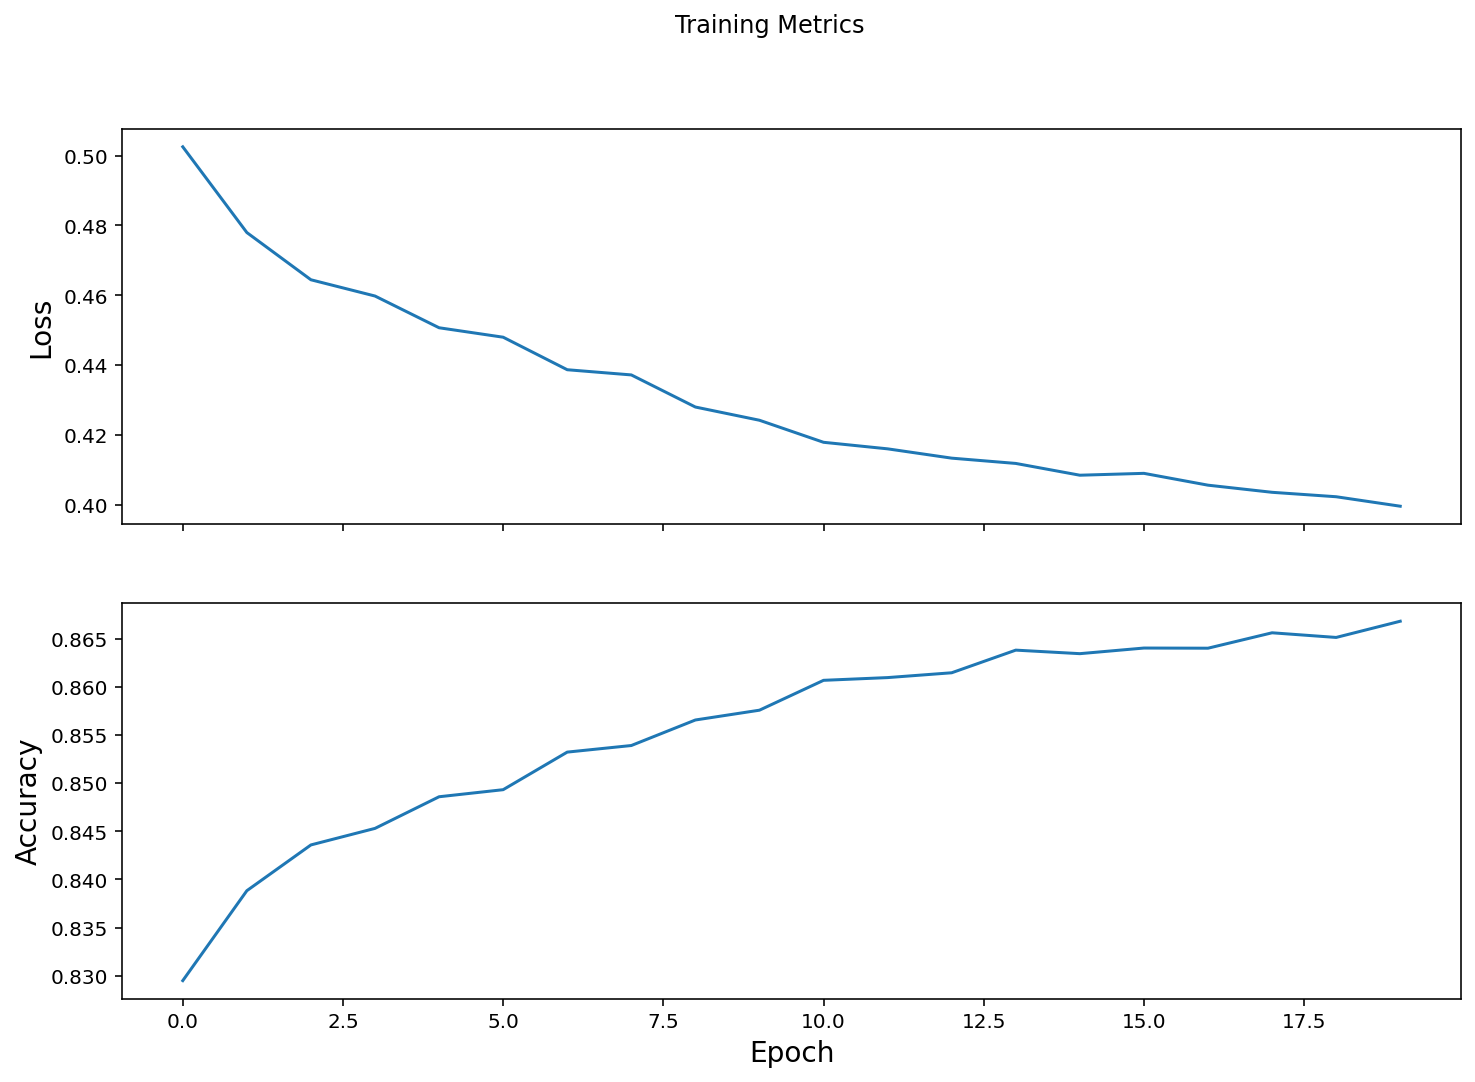

In [236]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [240]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
    # training=False is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    logits = model_tf(x, training=False)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 84.380%


##### Using Optimizer `minmize`

In [261]:
tf.keras.backend.clear_session()

model_tf = Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                       tf.keras.layers.Dense(128, activation='relu'),
                       tf.keras.layers.Dense(64, activation='relu'),
                       tf.keras.layers.Dense(len(class_names))
                      ])

In [262]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
        
# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 20

for epoch in range(1, num_epochs+1):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

#    tf.keras.losses.mse()
    loss_fn = lambda: tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)(y, model_tf(x))
    var_list_fn = lambda: model_tf.trainable_variables
    
    for x, y in train_dataset:
        opt.minimize(loss_fn, var_list_fn)
        
        # Track progress
        epoch_loss_avg.update_state(tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)(y, model_tf(x)))  # Add current batch loss
        # Compare predicted label to actual label
        # training=True is needed only if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        epoch_accuracy.update_state(y, model_tf(x, training=True))

    # End epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

#    if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 001: Loss: 0.482, Accuracy: 82.667%
Epoch 002: Loss: 0.402, Accuracy: 85.450%
Epoch 003: Loss: 0.384, Accuracy: 86.237%
Epoch 004: Loss: 0.372, Accuracy: 86.693%
Epoch 005: Loss: 0.360, Accuracy: 86.955%
Epoch 006: Loss: 0.355, Accuracy: 87.188%
Epoch 007: Loss: 0.347, Accuracy: 87.360%
Epoch 008: Loss: 0.344, Accuracy: 87.692%
Epoch 009: Loss: 0.341, Accuracy: 87.838%
Epoch 010: Loss: 0.335, Accuracy: 87.900%
Epoch 011: Loss: 0.334, Accuracy: 88.135%
Epoch 012: Loss: 0.328, Accuracy: 88.223%
Epoch 013: Loss: 0.325, Accuracy: 88.343%
Epoch 014: Loss: 0.323, Accuracy: 88.422%
Epoch 015: Loss: 0.320, Accuracy: 88.440%
Epoch 016: Loss: 0.316, Accuracy: 88.780%
Epoch 017: Loss: 0.315, Accuracy: 88.688%
Epoch 018: Loss: 0.316, Accuracy: 88.768%
Epoch 019: Loss: 0.311, Accuracy: 88.872%
Epoch 020: Loss: 0.308, Accuracy: 88.915%


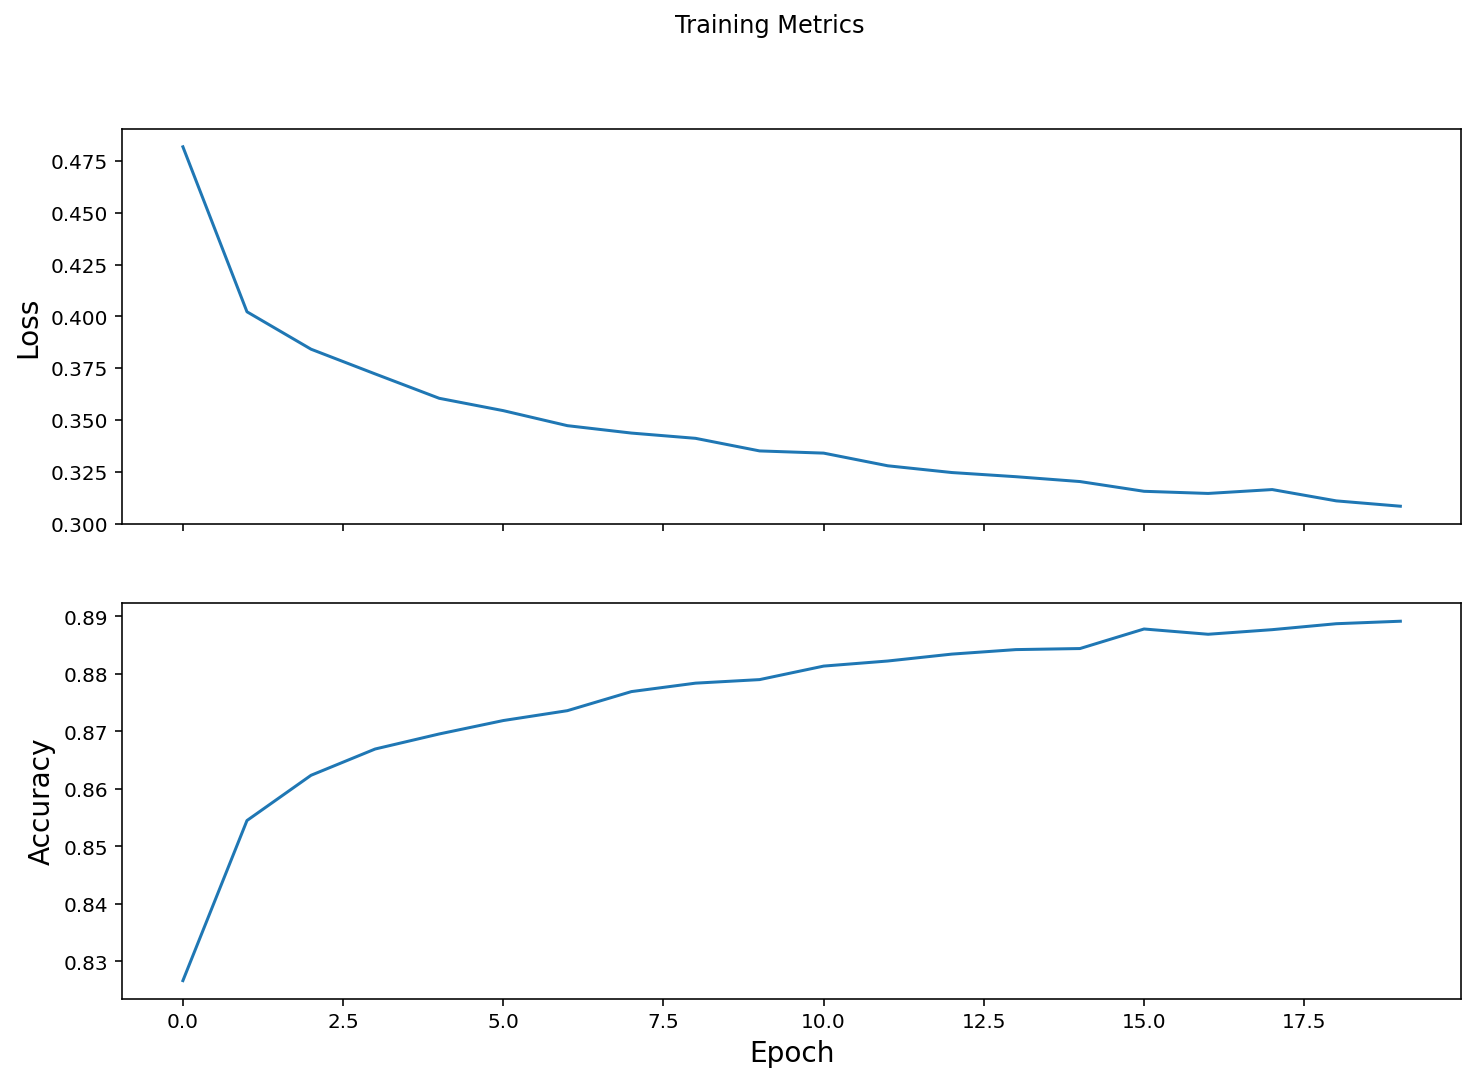

In [263]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()